In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [3]:
# Loading the dataset
df = pd.read_csv('../Data/Dataset.csv')
df.tail()

# Checking the dataset info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

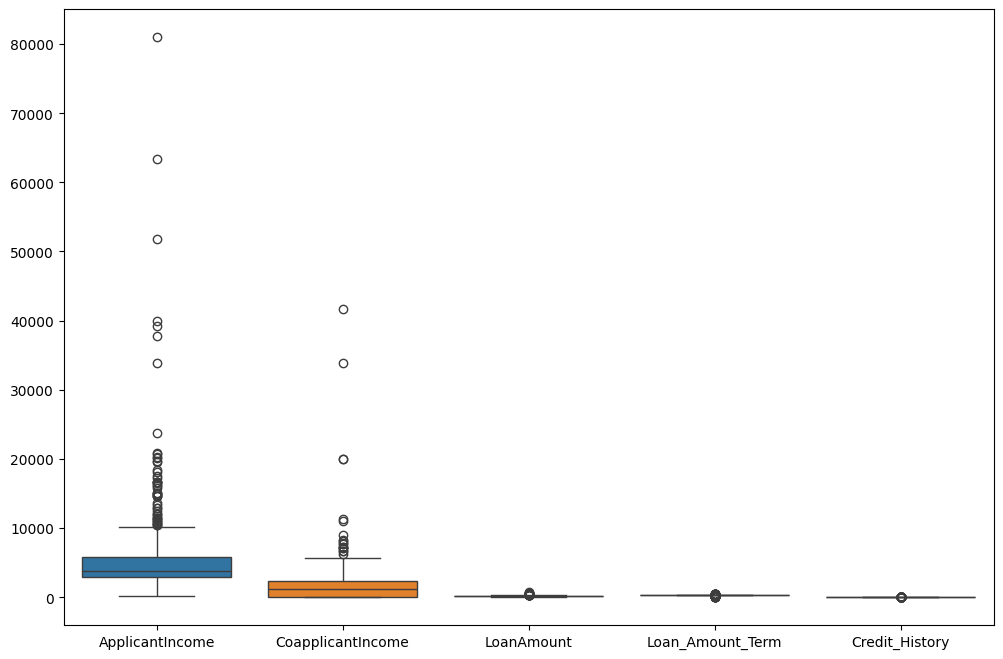

In [4]:
# Checking for outliers using a boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)

# Filling missing values for numerical data
df["LoanAmount"] = df['LoanAmount'].fillna(df["LoanAmount"].median())
df["Loan_Amount_Term"] = df['Loan_Amount_Term'].fillna(df["Loan_Amount_Term"].mean())
df["Credit_History"] = df['Credit_History'].fillna(df["Credit_History"].mean())

# Filling missing values for categorical data
df["Gender"] = df['Gender'].fillna(df["Gender"].mode()[0])
df["Married"] = df['Married'].fillna(df["Married"].mode()[0])
df["Credit_History"] = df['Credit_History'].fillna(df["Credit_History"].mode()[0])
df["Self_Employed"] = df['Self_Employed'].fillna(df["Self_Employed"].mode()[0])
df["Dependents"] = df['Dependents'].fillna(df["Dependents"].mode()[0])

# Checking for any remaining null values
df.isnull().sum()

Number of people who took loans by "gender":
Gender
Male      502
Female    112
Name: count, dtype: int64
Number of people who took loans by "marital status":
Married
Yes    401
No     213
Name: count, dtype: int64
Number of people who took loans by "education":
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

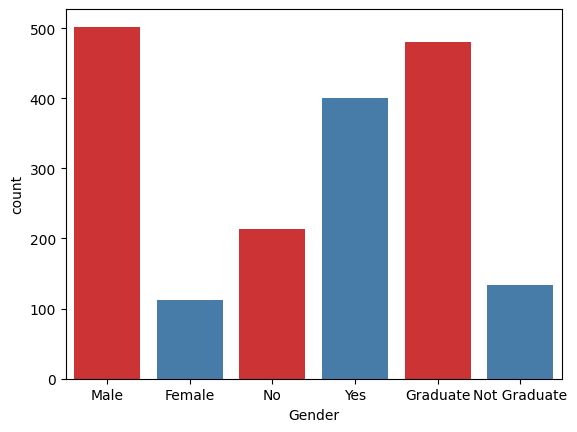

In [5]:
# Visualizing loan distributions by gender, marital status, and education
print('Number of people who took loans by "gender":')
print(df['Gender'].value_counts())
sns.countplot(x='Gender', data=df, palette='Set1')

print('Number of people who took loans by "marital status":')
print(df['Married'].value_counts())
sns.countplot(x='Married', data=df, palette='Set1')

print('Number of people who took loans by "education":')
print(df['Education'].value_counts())
sns.countplot(x='Education', data=df, palette='Set1')


<Axes: xlabel='Total_Income_Log', ylabel='Density'>

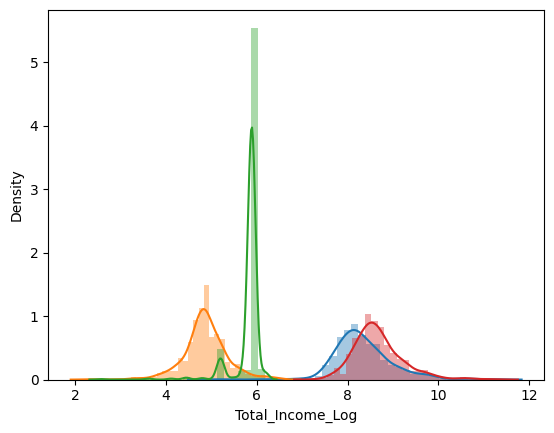

In [6]:
# Correlation matrix for numerical features
corr = df.select_dtypes(include=['float64', 'int64']).corr()
corr

# Feature Engineering - Creating a new column 'TotalApplicantIncome'
df['TotalApplicantIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.head()

# Log transformation of skewed data
df['ApplicantIncomeLog'] = np.log(df['ApplicantIncome'] + 1)
sns.distplot(df['ApplicantIncomeLog'])

df['LoanAmountLog'] = np.log(df['LoanAmount'] + 1)
sns.distplot(df['LoanAmountLog'])

df['Loan_Amount_Term_Log'] = np.log(df['Loan_Amount_Term'] + 1)
sns.distplot(df['Loan_Amount_Term_Log'])

df['Total_Income_Log'] = np.log(df['TotalApplicantIncome'] + 1)
sns.distplot(df['Total_Income_Log'])

In [7]:
# Dropping unnecessary columns
cols_to_drop = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'TotalApplicantIncome', 'Loan_ID']
df = df.drop(columns=cols_to_drop, axis=1)
df.head(5)

# Encoding categorical variables using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols_to_encode = ['Gender', 'Married', 'Education', 'Property_Area', 'Loan_Status', 'Dependents', 'Self_Employed']
for col in cols_to_encode:
    df[col] = le.fit_transform(df[col])
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,1,0,0,0,0,1.0,2,1,8.674197,4.859812,5.888878,8.674197
1,1,1,1,0,0,1.0,0,0,8.430327,4.859812,5.888878,8.714732
2,1,1,0,0,1,1.0,2,1,8.006701,4.204693,5.888878,8.006701
3,1,1,0,1,0,1.0,2,1,7.857094,4.795791,5.888878,8.505525
4,1,0,0,0,0,1.0,2,1,8.699681,4.955827,5.888878,8.699681


In [8]:
# Defining features (X) and target (y) for prediction
X = df.drop(columns=['Loan_Status'], axis=1)  # Features
y = df['Loan_Status']  # Target

# Displaying features and target
print("Features for prediction:")
print(X.head())

print("\nTarget for prediction:")
print(y.head())

Features for prediction:
   Gender  Married  Dependents  Education  Self_Employed  Credit_History  \
0       1        0           0          0              0             1.0   
1       1        1           1          0              0             1.0   
2       1        1           0          0              1             1.0   
3       1        1           0          1              0             1.0   
4       1        0           0          0              0             1.0   

   Property_Area  ApplicantIncomeLog  LoanAmountLog  Loan_Amount_Term_Log  \
0              2            8.674197       4.859812              5.888878   
1              0            8.430327       4.859812              5.888878   
2              2            8.006701       4.204693              5.888878   
3              2            7.857094       4.795791              5.888878   
4              2            8.699681       4.955827              5.888878   

   Total_Income_Log  
0          8.674197  
1          

In [9]:
# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Training various models and evaluating their performance
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [10]:
# Logistic Regression
model1 = LogisticRegression()
model1.fit(X_train, y_train)
y_pred_model1 = model1.predict(X_test)
print('Logistic Regression Accuracy:', round(accuracy_score(y_test, y_pred_model1) * 100, 2))

# Decision Tree Classifier
model2 = DecisionTreeClassifier()
model2.fit(X_train, y_train)
y_pred_model2 = model2.predict(X_test)
print('Decision Tree Classifier Accuracy:', round(accuracy_score(y_test, y_pred_model2) * 100, 2))

# Random Forest Classifier
model3 = RandomForestClassifier()
model3.fit(X_train, y_train)
y_pred_model3 = model3.predict(X_test)
print('Random Forest Classifier Accuracy:', round(accuracy_score(y_test, y_pred_model3) * 100, 2))

# K-Nearest Neighbors Classifier
model4 = KNeighborsClassifier(n_neighbors=3)
model4.fit(X_train, y_train)
y_pred_model4 = model4.predict(X_test)
print('K-Nearest Neighbors Classifier Accuracy:', round(accuracy_score(y_test, y_pred_model4) * 100, 2))


Logistic Regression Accuracy: 77.27
Decision Tree Classifier Accuracy: 74.68
Random Forest Classifier Accuracy: 77.27
K-Nearest Neighbors Classifier Accuracy: 71.43


In [11]:
# Generating classification reports for each model
def generate_classification_report(model_name, y_test, y_pred):
    report = classification_report(y_test, y_pred)
    print(f'Classification Report for {model_name}:\n{report}\n')
    
generate_classification_report('Logistic Regression', y_test, y_pred_model1)
generate_classification_report('Decision Tree', y_test, y_pred_model2)
generate_classification_report('Random Forest', y_test, y_pred_model3)
generate_classification_report('K-Nearest Neighbors', y_test, y_pred_model4)


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.91      0.39      0.55        54
           1       0.75      0.98      0.85       100

    accuracy                           0.77       154
   macro avg       0.83      0.68      0.70       154
weighted avg       0.81      0.77      0.74       154


Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.66      0.57      0.61        54
           1       0.79      0.84      0.81       100

    accuracy                           0.75       154
   macro avg       0.72      0.71      0.71       154
weighted avg       0.74      0.75      0.74       154


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.81      0.46      0.59        54
           1       0.76      0.94      0.84       100

    accuracy                           0.77       1

In [12]:
# Handling class imbalance with RandomOverSampler
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler()
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Splitting the resampled dataset into training and testing sets
X_resampled_train, X_resampled_test, y_resampled_train, y_resampled_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42)


In [14]:
# Re-training the Random Forest model on the resampled data
model3.fit(X_resampled_train, y_resampled_train)
y_pred_model3_resampled = model3.predict(X_resampled_test)
print('Random Forest Classifier Accuracy after Resampling:', round(accuracy_score(y_resampled_test, y_pred_model3_resampled) * 100, 2))

# Saving the trained Random Forest model to a file
import joblib

model_filename = "Random forest joblib.h5"
with open(model_filename, "wb") as model_file:
    joblib.dump(model3, model_file)
    print(f"The model has been saved to {model_filename}")

Random Forest Classifier Accuracy after Resampling: 82.46
The model has been saved to Random forest joblib.h5


In [16]:
# Step 1: Load the trained model
model_filename = "../models/Random forest joblib.h5"
model = joblib.load(model_filename)

new_data = {
    'Gender': [1],            # 1 for Male, 0 for Female
    'Married': [1],           # 1 for Married, 0 for Not Married
    'Dependents': [0],        # Number of dependents
    'Education': [0],         # 0 for Graduate, 1 for Not Graduate
    'Self_Employed': [0],     # 0 for No, 1 for Yes
    'Credit_History': [1.0],  # Credit History
    'Property_Area': [2],     # encoded value, e.g., 0 for Rural, 1 for Semiurban, 2 for Urban
    'ApplicantIncomeLog': [np.log(5000 + 1)],  # Log transformation of Applicant Income
    'LoanAmountLog': [np.log(150 + 1)],        # Log transformation of Loan Amount
    'Loan_Amount_Term_Log': [np.log(360 + 1)], # Log transformation of Loan Amount Term
    'Total_Income_Log': [np.log(5000 + 2000 + 1)] # Log transformation of Total Applicant Income
}

# Convert the dictionary to a DataFrame
new_data_df = pd.DataFrame(new_data)

# Step 3: Make a prediction
prediction = model.predict(new_data_df)

# Step 4: Interpret the prediction
loan_status = 'Approved' if prediction[0] == 1 else 'Not Approved'
print(f"The predicted loan status is: {loan_status}")

The predicted loan status is: Approved
